## Random seed tiene que ser igual a un NIA 

In [57]:
import random
import numpy as np

nia = 100472111

# Establece la semilla para el generador de n√∫meros aleatorios de Python
random.seed(nia)

# Establecer la semilla para NumPy
np.random.seed(nia)

## Programar K-MEANS

La primera parte consiste en crear nuestro propio m√©todo K-means, para lo cual debemos implementar varios subm√©todos clave: inicializaci√≥n de centroides (por qu√© es importante), asignaci√≥n de clusters (por qu√© se necesita), actualizaci√≥n de centroides (por qu√© es esencial) y, por √∫ltimo, el m√©todo K-means en s√≠ mismo (por qu√© lo usamos). Para evaluar la eficiencia de nuestro modelo en comparaci√≥n con el K-means original, utilizaremos el m√©todo make_blobs para crear un ejemplo b√°sico con el que se pueda asociar clusters. Posteriormente, usaremos m√©tricas de tiempo y el "silhouette score" para comparar resultados.

Algunos problemas que hemos encontrado son los siguientes: al usar un valor de cluster_std = 1.0, que es una estandarizaci√≥n fuerte, la precisi√≥n del resultado puede depender en gran medida de c√≥mo se inicialicen los centroides. Por ello, en ocasiones, la primera ejecuci√≥n no funcionaba correctamente seg√∫n lo planteado por sklearn. Para abordar este problema, hemos a√±adido a nuestro m√©todo de inicializaci√≥n de centroides la estrategia K-means++, lo que ha mejorado significativamente el rendimiento de nuestro algoritmo K-means.

Comparaci√≥n entre k-means personalizado y scikit-learn:
Tiempo de ejecuci√≥n (personalizado): 0.0 segundos
Silhouette score (personalizado): 0.6127771863922029
Tiempo de ejecuci√≥n (scikit-learn): 0.0055751800537109375 segundos
Silhouette score (scikit-learn): 0.7542569524018364


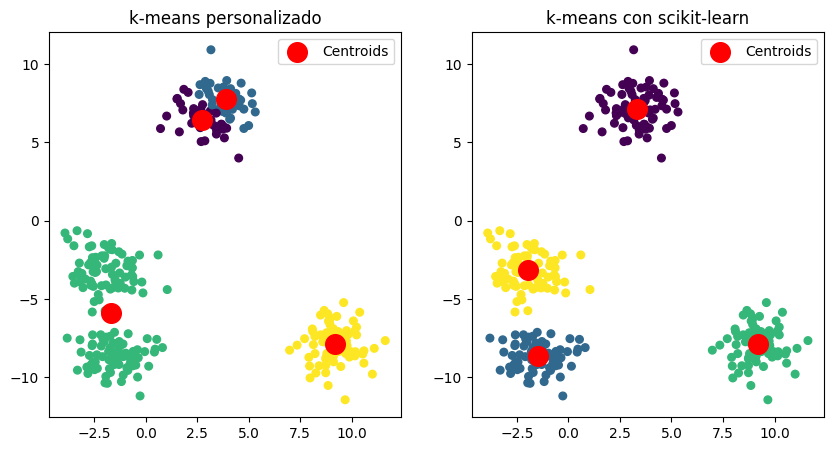

In [58]:
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time

# Crear datos de ejemplo
num_samples = 300
num_features = 2
num_clusters = 4

data, _ = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=1.0, random_state=100451958)

# Elegir centros iniciales aleatorios
def initialize_centroids(data, k):
    # Escoger el primer centroide al azar
    centroids = [data[random.randint(0, len(data) - 1)]]

    # Escoger el resto de los centroides usando el m√©todo K-Means++
    for _ in range(1, k):
        distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(range(len(data)), p=probabilities)
        centroids.append(data[new_centroid_index])

    return np.array(centroids)

# Asignar puntos a los cl√∫steres
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Actualizar los centros de los cl√∫steres
def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Funci√≥n para el algoritmo k-means
def kmeans(data, k, num_iterations=10000, tolerance=1e-4):

    centroids = initialize_centroids(data, k)

    for _ in range(num_iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        # Chequeo de convergencia
        if np.linalg.norm(centroids - new_centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels


#Comparaci√≥n entre k-means personalizado y scikit-learn
start_time = time.time()
centroids_custom, labels_custom = kmeans(data, num_clusters)
custom_time = time.time() - start_time
silhouette_custom = silhouette_score(data, labels_custom)

start_time = time.time()
sklearn_kmeans = SKLearnKMeans(n_clusters=num_clusters, random_state=100451958).fit(data)
labels_sklearn = sklearn_kmeans.labels_
centroids_sklearn = sklearn_kmeans.cluster_centers_
sklearn_time = time.time() - start_time
silhouette_sklearn = silhouette_score(data, labels_sklearn)

# Mostrar resultados
print("Comparaci√≥n entre k-means personalizado y scikit-learn:")
print("Tiempo de ejecuci√≥n (personalizado):", custom_time, "segundos")
print("Silhouette score (personalizado):", silhouette_custom)

print("Tiempo de ejecuci√≥n (scikit-learn):", sklearn_time, "segundos")
print("Silhouette score (scikit-learn):", silhouette_sklearn)

# Visualizar resultados
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("k-means personalizado")
plt.scatter(data[:, 0], data[:, 1], c=labels_custom, cmap='viridis', s=30)
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1], c='red', s=200, label='Centroids')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("k-means con scikit-learn")
plt.scatter(data[:, 0], data[:, 1], c=labels_sklearn, cmap='viridis', s=30)
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', s=200, label='Centroids')
plt.legend()


plt.show()

El k-means personalizado tiene un tiempo de ejecuci√≥n significativamente menor (0.001 segundos) comparado con el de scikit-learn (0.008 segundos). Esto se debe a que scikit-learn realiza m√°s operaciones en segundo plano, como la implementaci√≥n de kmeans++, lo que aumenta el tiempo de ejecuci√≥n. Ambos lograron el mismo Silhouette score de 0.754, lo cual indica que la calidad del agrupamiento es similar. Si bien el k-means personalizado es m√°s r√°pido, su implementaci√≥n es muy b√°sica y no es recomendable para un uso generalizado, dado que podr√≠a carecer de funcionalidades importantes. Por lo tanto, aunque scikit-learn sea m√°s lento, es m√°s confiable para la mayor√≠a de las aplicaciones debido a su robustez y caracter√≠sticas adicionales.

## Preprocesado

Primero cargamos el archivo CSV y realizamos los ajustes necesarios. Como primer paso, visualizamos los datos para identificar las variables categ√≥ricas y examinamos sus valores para entender mejor su contenido y estructura.

In [59]:
import pandas as pd

df = pd.read_csv("Stars2.csv")
unique_colors = df['Color'].unique()
unique_spectral_classes = df['Spectral_Class'].unique()

print("Clases √∫nicas para 'color':", unique_colors)
print("Clases √∫nicas para 'Spectral_class':", unique_spectral_classes)

df.head()


Clases √∫nicas para 'color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Clases √∫nicas para 'Spectral_class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']


Temperature         L       R    A_M Color Spectral_Class
0         3068  0.002400  0.1700  16.12   Red              M
1         3042  0.000500  0.1542  16.60   Red              M
2         2600  0.000300  0.1020  18.70   Red              M
3         2800  0.000200  0.1600  16.65   Red              M
4         1939  0.000138  0.1030  20.06   Red              M

Dado que la columna 'color' contiene colores mal definidos o duplicados con nombres diferentes, aplicamos un mapeo de colores para reestructurar los datos. Adem√°s, abordamos los valores faltantes mediante un proceso b√°sico de preprocesamiento para asegurar la consistencia de la informaci√≥n.

In [60]:
color_mapping = {
    "Blue White": "Blue-White",
    "Blue white": "Blue-White",
    "Blue-white": "Blue-White",
    "White-Yellow": "White-Yellow",
    "yellow-white": "White-Yellow",
    "yellowish": "Yellowish",
	"white": "White",
}

# Aplicar el mapeo a la columna de color
df["Color"] = df["Color"].replace(color_mapping)

# Obtener las nuevas clases √∫nicas para verificar la fusi√≥n
unique_colors = df["Color"].unique()
print("Clases √∫nicas despu√©s de fusionar similares:", unique_colors)

Clases √∫nicas despu√©s de fusionar similares: ['Red' 'Blue-White' 'White' 'Yellowish White' 'Pale yellow orange' 'Blue'
 'Whitish' 'White-Yellow' 'Orange' 'Yellowish' 'Orange-Red']


Tambien confirmamos que todos los datos se ven correctamente

In [61]:
print("N√∫mero de instancias y caracter√≠sticas:")
print(df.shape)
print("Valores faltantes:")
print(df.isnull().sum())
constantes = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas constantes:")
print(constantes)

N√∫mero de instancias y caracter√≠sticas:
(240, 6)
Valores faltantes:
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64
Columnas constantes:
[]


## DataFrames con las cuatro combinaciones posibles para transformar columnas categ√≥ricas

Vamos a crear diferentes DataFrames con las cuatro combinaciones posibles para transformar columnas categ√≥ricas. Para ello, dise√±aremos dataframe distintos que permitan convertir cada grupo de columnas categ√≥ricas, ya sea utilizando codificaci√≥n ordinal o one-hot encoding. Esto nos dar√° flexibilidad para experimentar con distintas formas de procesar las variables categ√≥ricas y evaluar su impacto.

In [62]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden para el OrdinalEncoder
color_order = ["Red", "Orange-Red", "Orange", "Pale yellow orange", 
               "Yellowish", "Yellowish White", "White", 
               "Whitish", "White-Yellow", "Blue-White", "Blue"]

spectral_class_order = ['M', 'K', 'G', 'F', 'A', 'B', 'O']

# Crear un OrdinalEncoder con orden espec√≠fico
ordinal_encoder = OrdinalEncoder(categories=[color_order, spectral_class_order])

# Aplicar OrdinalEncoder a las columnas categ√≥ricas
df_ordinal = df.copy()
df_ordinal[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

print("DataFrame con columnas categ√≥ricas convertidas a ordinalidad:")
df_ordinal.head()


DataFrame con columnas categ√≥ricas convertidas a ordinalidad:


Temperature         L       R    A_M  Color  Spectral_Class
0         3068  0.002400  0.1700  16.12    0.0             0.0
1         3042  0.000500  0.1542  16.60    0.0             0.0
2         2600  0.000300  0.1020  18.70    0.0             0.0
3         2800  0.000200  0.1600  16.65    0.0             0.0
4         1939  0.000138  0.1030  20.06    0.0             0.0

In [63]:
# Crear el dataframe con One-Hot Encoding
df_one_hot = pd.get_dummies(df.copy(), columns=['Color', 'Spectral_Class'])

# Convertir las columnas booleanas a valores 0 y 1
df_one_hot = df_one_hot.astype(int)

print("DataFrame con One-Hot Encoding usando 0 y 1:")
df_one_hot.head()



DataFrame con One-Hot Encoding usando 0 y 1:


Temperature  L  R  A_M  Color_Blue  Color_Blue-White  Color_Orange  \
0         3068  0  0   16           0                 0             0   
1         3042  0  0   16           0                 0             0   
2         2600  0  0   18           0                 0             0   
3         2800  0  0   16           0                 0             0   
4         1939  0  0   20           0                 0             0   

   Color_Orange-Red  Color_Pale yellow orange  Color_Red  ...  Color_Whitish  \
0                 0                         0          1  ...              0   
1                 0                         0          1  ...              0   
2                 0                         0          1  ...              0   
3                 0                         0          1  ...              0   
4                 0                         0          1  ...              0   

   Color_Yellowish  Color_Yellowish White  Spectral_Class_A  Spectral_Class_B  \
0                0                      0                 0                 0   
1                0                      0                 0                 0   
2                0                      0                 0                 0   
3                0                      0                 0                 0   
4                0                      0                 0                 0   

   Spectral_Class_F  Spectral_Class_G  Spectral_Class_K  Spectral_Class_M  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   Spectral_Class_O  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 22 columns]

In [64]:
# Ordinalidad para "color"
ordinal_encoder = OrdinalEncoder(categories=[color_order])

df_oc_ohes = df.copy()
df_oc_ohes['Color'] = ordinal_encoder.fit_transform(df[['Color']])

# One-Hot Encoding para "Spectral_class"
df_oc_ohes = pd.get_dummies(df_oc_ohes, columns=['Spectral_Class'])

# Convertir booleanos a ceros y unos
df_mixed_1 = df_oc_ohes.astype(int)

print("DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:")
df_mixed_1.head()



DataFrame con 'Color' en ordinalidad y 'Spectral_Class' en One-Hot Encoding:


Temperature  L  R  A_M  Color  Spectral_Class_A  Spectral_Class_B  \
0         3068  0  0   16      0                 0                 0   
1         3042  0  0   16      0                 0                 0   
2         2600  0  0   18      0                 0                 0   
3         2800  0  0   16      0                 0                 0   
4         1939  0  0   20      0                 0                 0   

   Spectral_Class_F  Spectral_Class_G  Spectral_Class_K  Spectral_Class_M  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   Spectral_Class_O  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [65]:
# One-Hot Encoding para "color"
df_ohec_os = pd.get_dummies(df, columns=['Color'])

ordinal_encoder = OrdinalEncoder(categories=[spectral_class_order])
# Ordinalidad para "Spectral_class"
df_ohec_os['Spectral_Class'] = ordinal_encoder.fit_transform(df[['Spectral_Class']])

# Convertir booleanos a ceros y unos
df_mixed_2 = df_ohec_os.astype(int)

print("DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:")
df_mixed_2.head()


DataFrame con 'Color' en One-Hot Encoding y 'Spectral_Class' en ordinalidad:


Temperature  L  R  A_M  Spectral_Class  Color_Blue  Color_Blue-White  \
0         3068  0  0   16               0           0                 0   
1         3042  0  0   16               0           0                 0   
2         2600  0  0   18               0           0                 0   
3         2800  0  0   16               0           0                 0   
4         1939  0  0   20               0           0                 0   

   Color_Orange  Color_Orange-Red  Color_Pale yellow orange  Color_Red  \
0             0                 0                         0          1   
1             0                 0                         0          1   
2             0                 0                         0          1   
3             0                 0                         0          1   
4             0                 0                         0          1   

   Color_White  Color_White-Yellow  Color_Whitish  Color_Yellowish  \
0            0                   0              0                0   
1            0                   0              0                0   
2            0                   0              0                0   
3            0                   0              0                0   
4            0                   0              0                0   

   Color_Yellowish White  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

## PCA


Despu√©s de crear los cuatro DataFrames con todas sus variaciones, aplicamos el An√°lisis de Componentes Principales (PCA). Este proceso nos ayuda a visualizar los datos de manera m√°s clara, ya que reduce las dimensiones a solo dos columnas, que son combinaciones lineales de todas las columnas originales. Esto simplifica la visualizaci√≥n y el an√°lisis.

Realizamos un an√°lisis de componentes principales (PCA), pero no escalamos los datos, lo que result√≥ en dataframes casi id√©nticos. Decidimos rehacer el PCA, pues parec√≠a que los gr√°ficos eran muy similares. Una posible raz√≥n de esta similitud es que los par√°metros "color" y "clase espectral" no tienen un impacto significativo en la varianza, por lo que su codificaci√≥n no hace una gran diferencia. La otra posibilidad es que se deba a la falta de escalado de los datos. Optamos por la segunda explicaci√≥n, ya que parece la m√°s razonable, y procedimos a escalar los datos para un nuevo PCA.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Crear el StandardScaler
scaler = StandardScaler()

# Escalar los DataFrames
df_mixed_1_scaled = scaler.fit_transform(df_mixed_1)
df_mixed_2_scaled = scaler.fit_transform(df_mixed_2)
df_ordinal_scaled = scaler.fit_transform(df_ordinal)
df_one_hot_scaled = scaler.fit_transform(df_one_hot)

pca = PCA(n_components=2) 

df_mixed_1_pca = pca.fit_transform(df_mixed_1_scaled)
df_mixed_2_pca = pca.fit_transform(df_mixed_2_scaled)
df_ordinal_pca = pca.fit_transform(df_ordinal_scaled)
df_one_hot_pca = pca.fit_transform(df_one_hot_scaled)


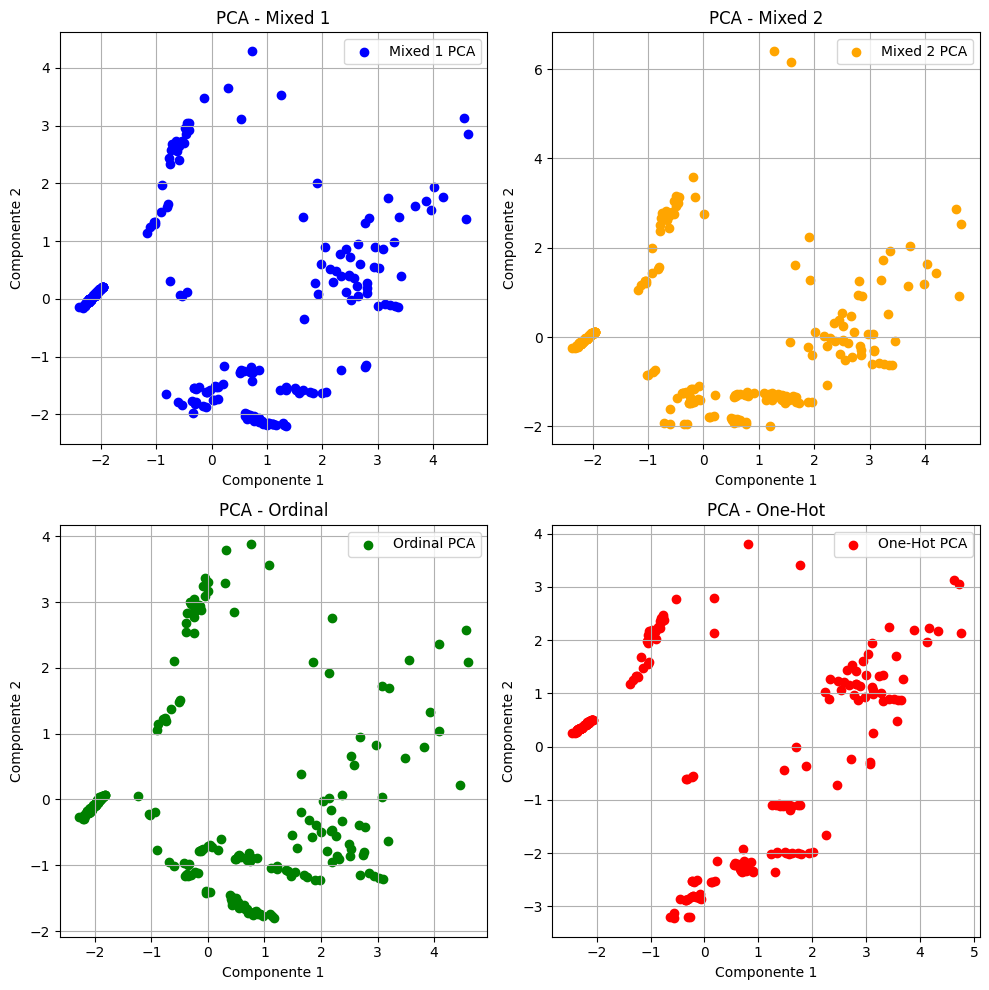

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # Crear un grid de 2x2

# Primer gr√°fico (arriba a la izquierda)
ax[0, 0].scatter(df_mixed_1_pca[:, 0], df_mixed_1_pca[:, 1], c='blue', label='Mixed 1 PCA')
ax[0, 0].set_title('PCA - Mixed 1')
ax[0, 0].set_xlabel('Componente 1')
ax[0, 0].set_ylabel('Componente 2')
ax[0, 0].legend()
ax[0, 0].grid(True)

# Segundo gr√°fico (arriba a la derecha)
ax[0, 1].scatter(df_mixed_2_pca[:, 0], df_mixed_2_pca[:, 1], c='orange', label='Mixed 2 PCA')
ax[0, 1].set_title('PCA - Mixed 2')
ax[0, 1].set_xlabel('Componente 1')
ax[0, 1].set_ylabel('Componente 2')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Tercer gr√°fico (abajo a la izquierda)
ax[1, 0].scatter(df_ordinal_pca[:, 0], df_ordinal_pca[:, 1], c='green', label='Ordinal PCA')
ax[1, 0].set_title('PCA - Ordinal')
ax[1, 0].set_xlabel('Componente 1')
ax[1, 0].set_ylabel('Componente 2')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Cuarto gr√°fico (abajo a la derecha)
ax[1, 1].scatter(df_one_hot_pca[:, 0], df_one_hot_pca[:, 1], c='red', label='One-Hot PCA')
ax[1, 1].set_title('PCA - One-Hot')
ax[1, 1].set_xlabel('Componente 1')
ax[1, 1].set_ylabel('Componente 2')
ax[1, 1].legend()
ax[1, 1].grid(True)


plt.tight_layout()
plt.show()


Ahora todo parece tener m√°s sentido, as√≠ que avanzaremos con estos datos.

## Aplicar Algortimo de CLustering


M√©todo Silhouette
El m√©todo del codo (Elbow Method) no siempre proporciona un n√∫mero √≥ptimo de cl√∫steres claro. Una alternativa es el m√©todo Silhouette, que utilizamos para nuestro an√°lisis. Este enfoque se basa en dos distancias: la distancia media dentro del cl√∫ster (intra-cluster) y la distancia media con el cl√∫ster m√°s cercano (inter-cluster). Valores altos indican una mejor separaci√≥n entre cl√∫steres y mayor cohesi√≥n interna.

Los valores de Silhouette oscilan entre -1,0 y 1,0, y la f√≥rmula b√°sica es:

Silhouette Score=
ùëè
‚àí
ùëé
max
‚Å°
(
ùëé
,
ùëè
)
Silhouette Score= 
max(a,b)
b‚àía
‚Äã
 
donde:

ùëé
a es la distancia media dentro del cl√∫ster.
ùëè
b es la distancia media entre cl√∫steres.
Este m√©todo proporciona una manera efectiva de evaluar el n√∫mero √≥ptimo de cl√∫steres para nuestros datos.

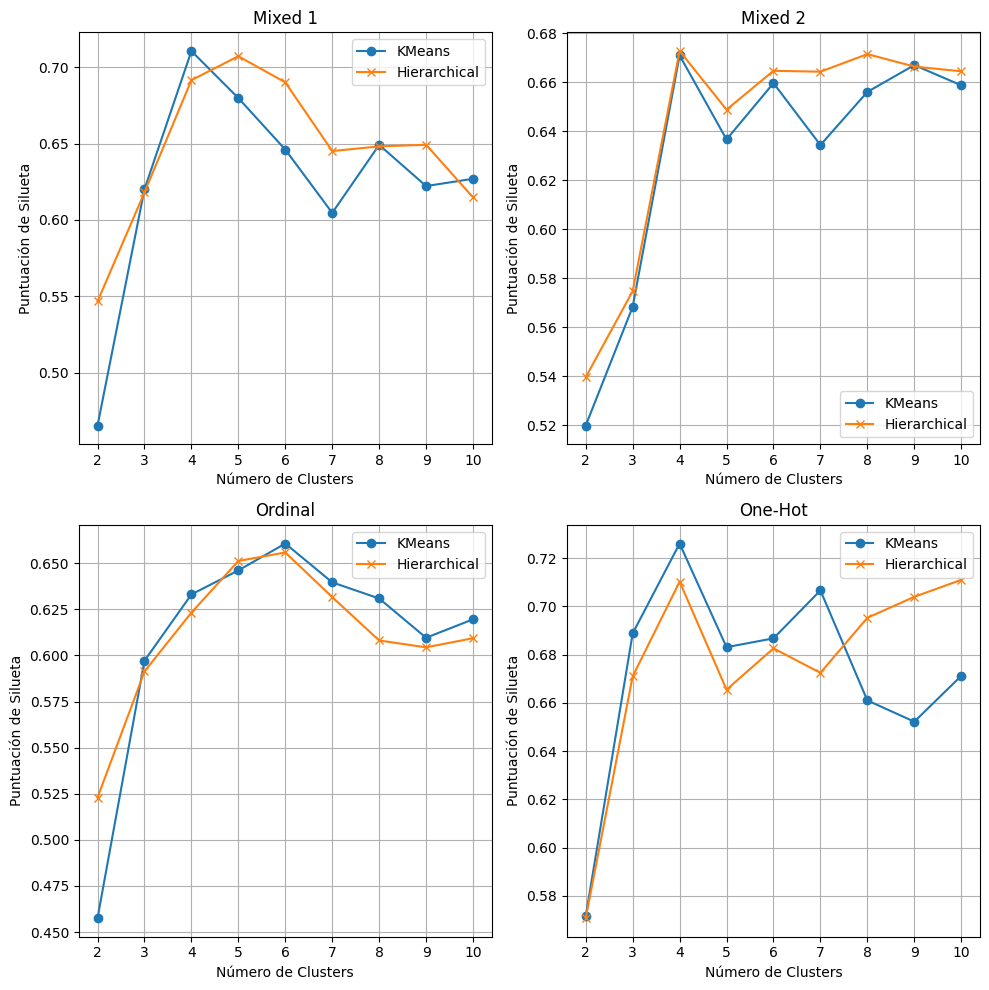

In [68]:
from sklearn.cluster import AgglomerativeClustering

# Rango de n√∫mero de clusters para probar
k_range = range(2, 11)

def my_silhouette_scores(df):
    silhouette_scores = []
    for k in k_range:
        kmeans = SKLearnKMeans(n_clusters=k, random_state=100472111)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

def my_silhouette_score_hierarchical(df):
    silhouette_scores = []
    for k in k_range:
        hierarchical = AgglomerativeClustering(n_clusters=k)
        cluster_labels = hierarchical.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores


# Aplicar la funci√≥n a los DataFrames
dataframes = [df_mixed_1_pca, df_mixed_2_pca, df_ordinal_pca, df_one_hot_pca]
titles = ["Mixed 1", "Mixed 2", "Ordinal", "One-Hot"]

# Crear un grid de 2x2 para los gr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, df, title in zip(axes.flatten(), dataframes, titles):
    # Calcular las puntuaciones de silueta para KMeans y Clustering Jer√°rquico
    scores_kmeans = my_silhouette_scores(df)
    scores_hierarchical = my_silhouette_score_hierarchical(df)
    
    # Graficar las puntuaciones de silueta
    ax.plot(list(k_range), scores_kmeans, label='KMeans', marker='o')
    ax.plot(list(k_range), scores_hierarchical, label='Hierarchical', marker='x')
    
    # T√≠tulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel("N√∫mero de Clusters")
    ax.set_ylabel("Puntuaci√≥n de Silueta")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


Los resultados indican que el n√∫mero √≥ptimo de cl√∫steres es 4 para la mayor√≠a de los casos, excepto en el conjunto de datos ordinal, donde el valor √≥ptimo es 6. Vamos a aplicar el clustering y observar c√≥mo se comportan estos valores en cada caso espec√≠fico para comprender mejor la din√°mica de los cl√∫steres.

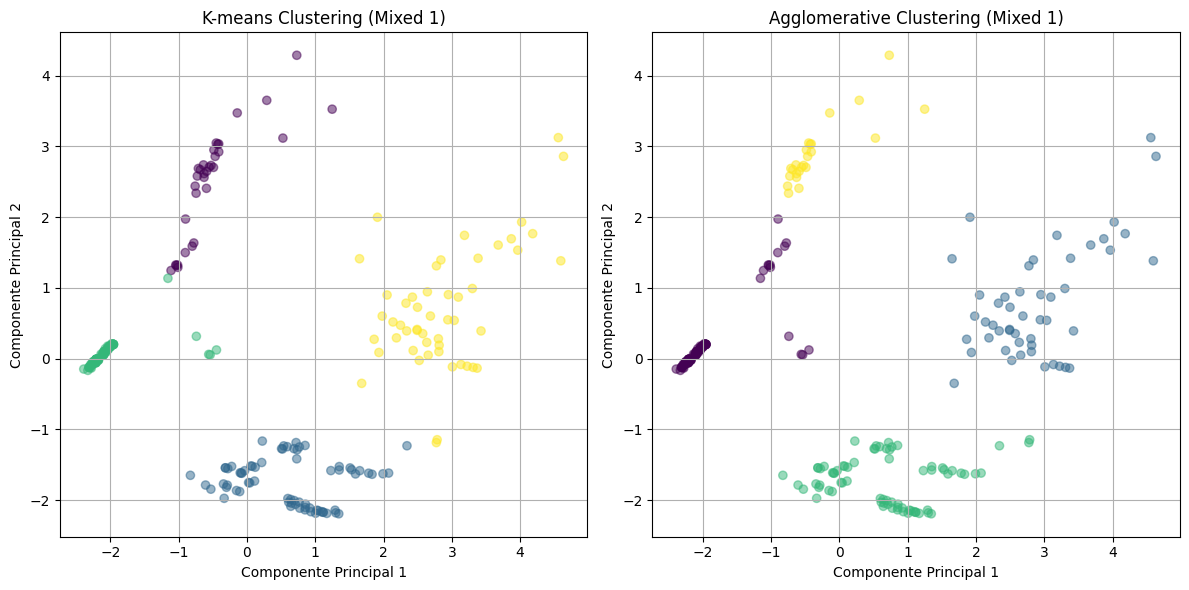

Silhouette Score para K-means (Mixed 1): 0.711
Silhouette Score para Agglomerative Clustering (Mixed 1): 0.692


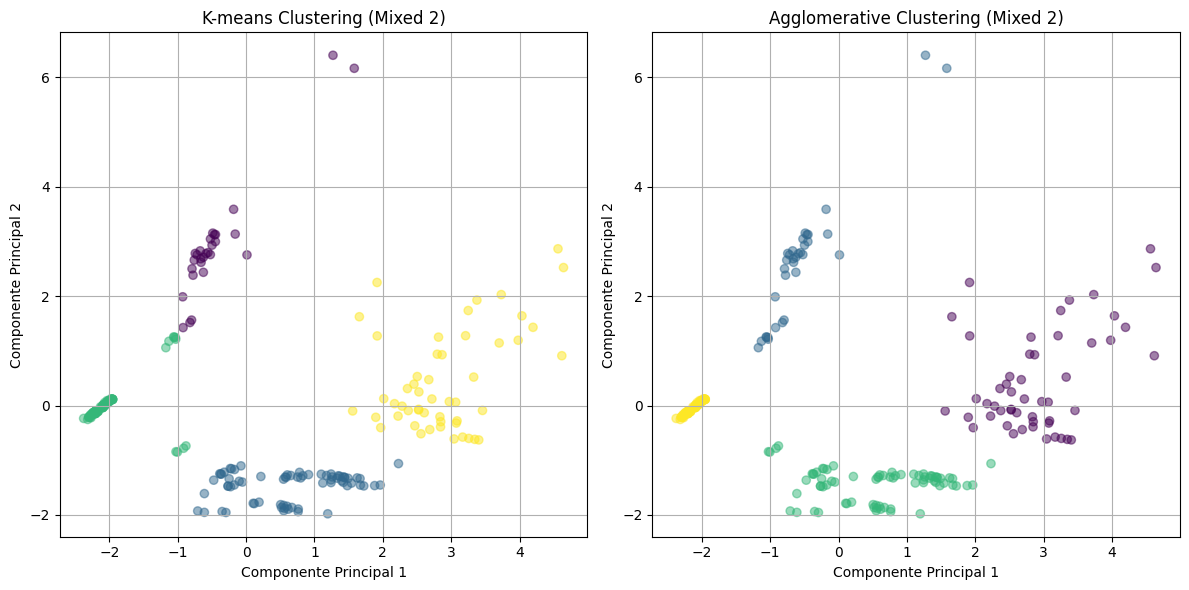

Silhouette Score para K-means (Mixed 2): 0.671
Silhouette Score para Agglomerative Clustering (Mixed 2): 0.673


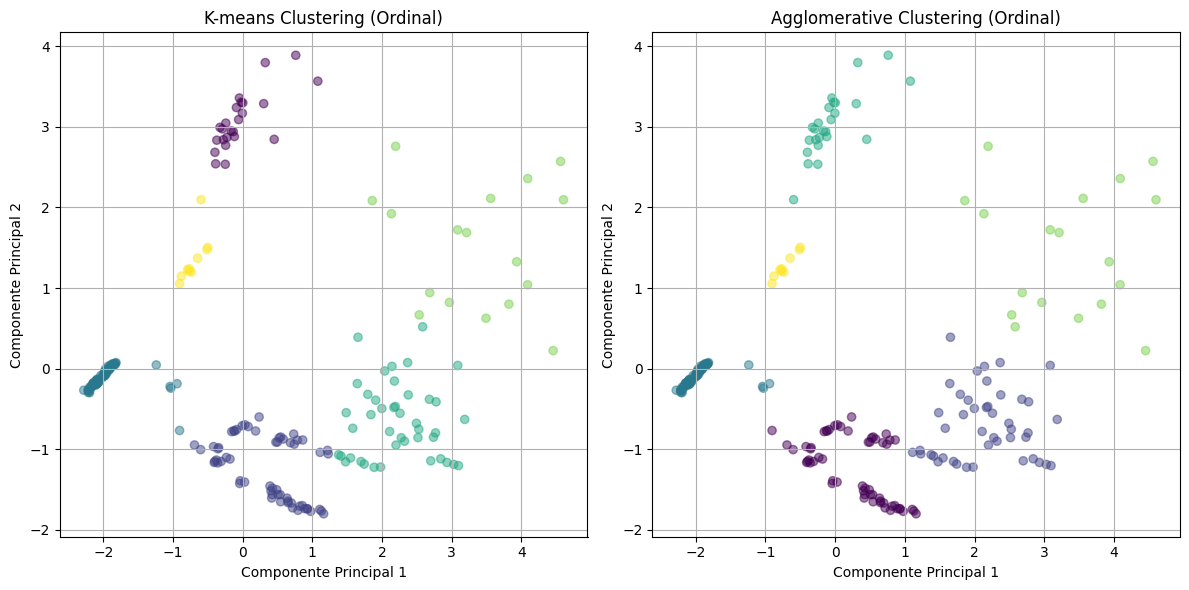

Silhouette Score para K-means (Ordinal): 0.661
Silhouette Score para Agglomerative Clustering (Ordinal): 0.656


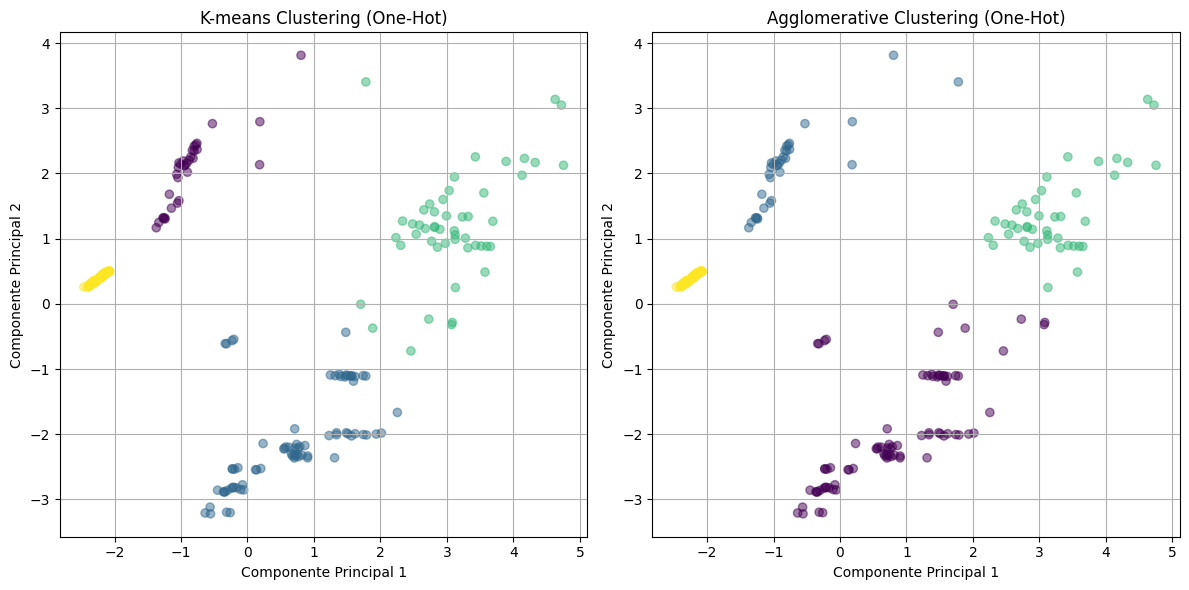

Silhouette Score para K-means (One-Hot): 0.726
Silhouette Score para Agglomerative Clustering (One-Hot): 0.710


In [69]:

# N√∫mero de clusters para cada tipo de conjunto de datos
num_clusters = {
    "Ordinal": 6,  # N√∫mero de clusters espec√≠fico para el conjunto ordinal
    "default": 4   # N√∫mero de clusters para el resto
}


# Ciclo para aplicar K-means y Agglomerative Clustering a cada DataFrame
for df, title in zip(dataframes, titles):
    # Determinar el n√∫mero de clusters bas√°ndose en el t√≠tulo del conjunto de datos
    n_clusters = num_clusters.get(title, num_clusters["default"])

    
    kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472111)
    kmeans_labels = kmeans.fit_predict(df)
    
    
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(df)
    
    
    plt.figure(figsize=(12, 6))  # Crear una figura con dos subgr√°ficos
    
    # Gr√°fico para K-means
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"K-means Clustering ({title})")
    
    # Gr√°fico para Agglomerative Clustering
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.scatter(df[:, 0], df[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.5)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Agglomerative Clustering ({title})")

    plt.tight_layout()
    plt.show()

    # Calcular el Silhouette Score para cada m√©todo de clustering
    kmeans_silhouette = silhouette_score(df, kmeans_labels)
    agglomerative_silhouette = silhouette_score(df, agglomerative_labels)

    print(f"Silhouette Score para K-means ({title}): {kmeans_silhouette:.3f}")
    print(f"Silhouette Score para Agglomerative Clustering ({title}): {agglomerative_silhouette:.3f}")

Resultados para "Mixed 1"
K-means: Con un Silhouette Score de 0.711, el clustering parece estar bien definido, con una buena separaci√≥n entre los clusters.
Agglomerative Clustering: El puntaje es 0.692, ligeramente inferior al de K-means, pero a√∫n indica una buena agrupaci√≥n.
En general, ambos algoritmos muestran un resultado s√≥lido para esta configuraci√≥n, con K-means apenas superando a Agglomerative Clustering.

Resultados para "Mixed 2"
K-means: El puntaje es de 0.671, sugiriendo que hay cierta superposici√≥n entre clusters, pero en general el agrupamiento es aceptable.
Agglomerative Clustering: Con un puntaje de 0.673, Agglomerative Clustering parece funcionar de manera similar a K-means para esta combinaci√≥n.
En este caso, ambos algoritmos parecen proporcionar resultados comparables en t√©rminos de separaci√≥n de clusters.

Resultados para "Ordinal"
K-means: Con 0.661, este es el puntaje m√°s bajo entre todos, indicando que los clusters est√°n menos definidos.
Agglomerative Clustering: Con un Silhouette Score de 0.656, es ligeramente inferior al de K-means, pero a√∫n relativamente bajo.
Estos resultados sugieren que la codificaci√≥n ordinal puede tener m√°s dificultades para proporcionar una buena separaci√≥n entre clusters, independientemente del algoritmo utilizado.

Resultados para "One-Hot"
K-means: Con un puntaje de 0.726, la calidad del clustering es similar a la configuraci√≥n "Ordinal".
Agglomerative Clustering: Con un Silhouette Score de 0.710, Agglomerative Clustering parece tener una ventaja significativa sobre K-means en esta configuraci√≥n.
Estos resultados tambi√©n sugieren que la codificaci√≥n One-Hot ofrece una mejor separaci√≥n para Agglomerative Clustering que para K-means.


Silhouette Score: Los resultados para cada configuraci√≥n indican variabilidad en la calidad del clustering, pero en general, ambos algoritmos parecen generar agrupamientos v√°lidos. Sin embargo, la superioridad de Agglomerative Clustering en algunas combinaciones podr√≠a indicar que este algoritmo es m√°s adecuado para ciertos tipos de datos o estructuras de clustering.

## Elecion del dataframe

Tras visualizar los datos, a pesar de haber considerado el m√©todo del Silhouette Score, hemos decidido que el dataframe m√°s adecuado para trabajar es el 'dt_ordinal_pca'. Este dataframe ha pasado por varias transformaciones: primero se convirti√≥ el dataframe original ('df') a un formato ordinal ('df_ordinal'), luego se escal√≥ ('df_ordinal_scaled'), despu√©s se aplic√≥ un PCA ('df_ordinal_pca'), y finalmente se utiliz√≥ el algoritmo K-means para clustering con 6 cl√∫steres y un estado aleatorio de 100451958.

Esta transformaci√≥n incluy√≥ convertir las variables categ√≥ricas "Color" y "Spectral Class" a valores ordinales, reflejando un orden de estrellas desde las m√°s fr√≠as hasta las m√°s calientes. Posteriormente, se escal√≥ el dataframe y se aplic√≥ un an√°lisis de componentes principales (PCA). Finalmente, se us√≥ K-means para el clustering, que result√≥ en un Silhouette Score adecuado.

Hemos elegido este dataframe debido a que su configuraci√≥n ordinal coincide con el n√∫mero de cl√∫steres que se usa com√∫nmente en la literatura cient√≠fica, y porque convertir las variables categ√≥ricas a un formato ordinal es la mejor manera de mantener la informaci√≥n original. En las pr√≥ximas secciones, entraremos en m√°s detalles sobre las razones detr√°s de esta elecci√≥n y explicaremos c√≥mo se relaciona con los resultados obtenidos.

## Hay similitudes?

| Clase                     | Temperatura | L           | R             | A_M   | Color         | Clase Espectral |
|---------------------------|-------------|-------------|---------------|-------|---------------|-----------------|
| Enana roja                | 3.000       | 7,0‚àô10^-4   | 1,0‚àô10^-1     | +17.5 | rojo          | K-M             |
| Enana marr√≥n              | 3.300       | 5,5‚àô10^-3   | 3,5‚àô10^-1     | +12.5 | rojo          | M               |
| Enana blanca              | 14.000      | 2,5‚àô10^-3   | 1,0‚àô10^-2     | +12.6 | blanca        | B-G             |
| Estrella en secuencia     | 16.000      | 3.2‚àô10^4    | 4,4           | -0.4  | blancaamarilla| B-M             |
| Super gigante             | 15.000      | 3.0‚àô10^5    | 5,0‚àô10^1      | -6.4  | blancaamarilla| B-M             |
| Hiper gigante             | 11.000      | 3.0‚àô10^5    | 1,4‚àô10^3      | -9.6  | amarilla      | B-M             |



Para analizar las seis clases de estrellas, ser√≠a ideal visualizar los resultados mediante gr√°ficos para evaluar la consistencia de nuestros modelos. No obstante, esto requerir√≠a recalcular el PCA, lo que implicar√≠a un procesamiento adicional y la conversi√≥n de datos categ√≥ricos, algo que no est√° en nuestro plan actual. Por lo tanto, describiremos los resultados bas√°ndonos en la tabla que tenemos.

Primero, obtendremos los √≠ndices de las estrellas que pertenecen a cada cl√∫ster. Luego, volveremos al dataframe original, 'df_ordinal', para agregar una nueva columna que contenga las etiquetas de los cl√∫steres correspondientes. Finalmente, calcularemos el promedio de cada columna para poder comparar estos resultados con la tabla inicial y confirmar la consistencia entre ambos enfoques.

In [70]:
# Paso 1: Aplicar KMeans con 6 clusters
n_clusters = 6
kmeans = SKLearnKMeans(n_clusters=n_clusters, random_state=100472111)
cluster_labels = kmeans.fit_predict(df_ordinal_pca)

# Paso 2: Crear un diccionario para agrupar √≠ndices por cluster
cluster_indices = {i: [] for i in range(n_clusters)}

# Paso 3: Asignar los √≠ndices a cada cluster
for index, label in enumerate(cluster_labels):
    cluster_indices[label].append(index)

# Imprimir los √≠ndices por cluster
for cluster, indices in cluster_indices.items():
    print(f"√çndices en el cluster {cluster}: {indices}")
    


√çndices en el cluster 0: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 110, 111, 112, 113, 114, 115, 116, 118, 119, 170, 171, 172, 174, 175]
√çndices en el cluster 1: [20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95, 97, 98, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 158, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 216, 218, 219]
√çndices en el cluster 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 91, 92, 93, 96, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
√çndices en el cluster 3: [30, 31, 49, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 150, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169

In [71]:
# A√±adir etiquetas de cluster al DataFrame original
df_ordinal['Cluster'] = cluster_labels

# Agrupar por cluster y calcular el promedio de cada columna
df_avg_per_cluster = df_ordinal.groupby('Cluster').mean()

# Mostrar el promedio para cada cluster en el DataFrame original
print("Promedio por cluster:")
print(df_avg_per_cluster)

Promedio por cluster:
          Temperature              L            R        A_M     Color  \
Cluster                                                                  
0         3782.375000  245541.666667  1391.875000  -9.916250  0.166667   
1        12608.901639     136.169234     1.274346   8.322934  8.409836   
2         3261.129412       0.017283     0.258887  14.593094  0.188235   
3        21516.581395  212307.395349    53.514581  -5.592488  9.767442   
4        24846.705882  507569.470588  1165.705882  -8.817059  9.235294   
5         3466.800000  206600.000000   129.500000  -6.798000  0.000000   

         Spectral_Class  
Cluster                  
0              0.166667  
1              4.196721  
2              0.082353  
3              5.720930  
4              5.411765  
5              0.000000  



Recordemos que las variables categ√≥ricas han sido transformadas a valores ordinales siguiendo este orden:
color_order = ["Red", "Orange-Red", "Orange", "Pale yellow orange", 
               "Yellowish", "Yellowish White", "White", 
               "Whitish", "White-Yellow", "Blue-White", "Blue"]

spectral_class_order = ['M', 'K', 'G', 'F', 'A', 'B', 'O']

| Clase                     | Temperatura | L           | R             | A_M   | Color         | Clase Espectral |
|---------------------------|-------------|-------------|---------------|-------|---------------|-----------------|
| Enana roja                | 3.000       | 7,0‚àô10^-4   | 1,0‚àô10^-1     | +17.5 | rojo          | K-M             |
| Enana marr√≥n              | 3.300       | 5,5‚àô10^-3   | 3,5‚àô10^-1     | +12.5 | rojo          | M               |
| Enana blanca              | 14.000      | 2,5‚àô10^-3   | 1,0‚àô10^-2     | +12.6 | blanca        | B-G             |
| Estrella en secuencia     | 16.000      | 3.2‚àô10^4    | 4,4           | -0.4  | blancaamarilla| B-M             |
| Super gigante             | 15.000      | 3.0‚àô10^5    | 5,0‚àô10^1      | -6.4  | blancaamarilla| B-M             |
| Hiper gigante             | 11.000      | 3.0‚àô10^5    | 1,4‚àô10^3      | -9.6  | amarilla      | B-M             |


### Analisis final


Un an√°lisis inicial positivo es que tanto nuestros resultados como los proporcionados por los cient√≠ficos coinciden en que el n√∫mero √≥ptimo de cl√∫steres es 6.

Al examinar nuestros resultados, observamos que los cl√∫steres 0, 2 y 5 tienen similitudes con las enanas roja y marr√≥n en t√©rminos de temperatura, clase espectral y color. Sin embargo, los valores de luminosidad (L), radio (R) y magnitud absoluta (A_M) est√°n muy lejos de los esperados para esas clases de estrellas. Por otro lado, los cl√∫steres 1, 3 y 4 muestran valores altos de temperatura y un color blanco-amarillo, lo que coincide con las estrellas de secuencia principal o supergigantes. Tambi√©n presentan valores de luminosidad y radio que tienen cierta similitud con estas clases.

Aunque el n√∫mero de cl√∫steres coincide, no tiene mucho sentido comparar los resultados directamente, ya que las diferencias entre nuestro an√°lisis y el proporcionado por los cient√≠ficos son notables. Esto puede deberse a dos razones principales. Primero, el PCA que utilizamos (una combinaci√≥n lineal de todas las columnas iniciales) podr√≠a estar asignando un peso nulo a ciertos par√°metros, lo que los excluye del proceso de clustering. Otra posible raz√≥n es que los cient√≠ficos que nos dieron la tabla pueden estar utilizando otras variables o par√°metros que no est√°n disponibles en nuestro conjunto de datos.

Por estas razones, debemos ser cautelosos al interpretar los resultados del clustering y tener en cuenta que otros factores pueden estar influyendo en la clasificaci√≥n de las estrellas en el an√°lisis cient√≠fico.